## Zadanie domowe: morfologiczna gra w życie – John Conway

### Wykorzystanie operacji LUT w przekształceniu trafi, nie trafi
  - Szybszą metodą wykonania transformacji trafi, nie trafi może być operacja LUT.
  - Technika polega na zakodowaniu wyników wszystkich interesujących  konfiguracji, a następnie podczas przetwarzania wykorzystania operacji LUT.
  - Dla otoczenia 3x3 możliwe jest 512 różnych konfiguracji.
  - Aby praktycznie zrealizować operacje, każdej konfiguracji należy nadać unikalny indeks. Jedną z możliwości jest pomnożenie elementu strukturalnego przez macierz (mnożenie odpowiednich elementów):
  ```
  [[1, 8,  64],
   [ 2, 16, 128],
   [ 4, 32, 256]]
  ```
  Przykładowo elementowi:
  ```
  [[1, 1, 0],
   [ 1, 0, 1],
   [ 1, 0, 1]]
  ```
  odpowiada liczba: 1(1) + 2(1) + 4(1) + 8(1) + 128(1) + 256(1) = 399.
  
### Przykład działania metody – detekcja punktów końcowych na obrazie.
  - założenie: punkt końcowy to punkt, który ma dokładnie jednego sąsiada,
  - zdefiniuj funkcję, która jako argument pobiera otoczenie, a zwraca 0 lub 1 w zależności od tego, czy rozpatrywany punkt jest końcowy np. dla sąsiedztwa 3×3 punkt będzie końcowy, jeżeli jest zapalony i ma tylko jednego sąsiada (czyli suma pikseli jest równa 2).
  - wygeneruj przekodowanie LUT.
  - wczytaj obraz szkielet.bmp (należy go przekształcić, aby uzyskać dwuwymiarową tablicę o wartościach 0-1). Wykorzystując wygenerowane przekodowanie LUT wykonaj detekcję zakończeń. Wyświetl obraz oryginalny i po przekodowaniu LUT.


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from itertools import product

if not os.path.exists("szkielet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/szkielet.bmp --no-check-certificate

In [2]:
def get_lut_index(context):
    return np.sum(context * np.array([2**i for i in range(9)]).reshape(3, 3))

In [3]:
def get_lut_table(context_func):
    lut_table = [None] * 2**9
    
    for arragement in product([0, 1], repeat=9):
        context = np.array(arragement).reshape(3, 3)
        lut_table[get_lut_index(context)] = context_func(context)
    
    return lut_table

In [4]:
def lut_hit_miss(image, lut_table):
    transformed = np.zeros(image.shape, dtype='uint8')
    width, height = image.shape

    for x in range(1, width-1):
        for y in range(1, height-1):
            context = image[x-1:x+2, y-1:y+2]
            transformed[x, y] = lut_table[get_lut_index(context)]
    
    return transformed

In [5]:
szkielet = cv2.cvtColor(cv2.imread('szkielet.bmp'), cv2.COLOR_BGR2GRAY).astype('bool')

In [6]:
def is_endpoint(context):
    return context[1][1] > 0 and np.sum(context) == 2

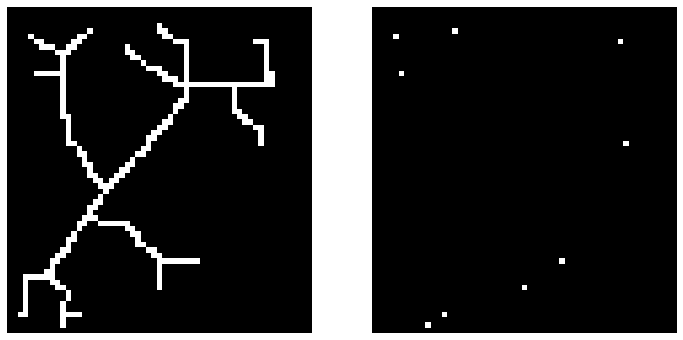

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plt.gray()
ax[0].imshow(szkielet)
ax[0].axis('off')

detected = lut_hit_miss(szkielet, get_lut_table(is_endpoint))
ax[1].imshow(detected)
ax[1].axis('off')

plt.show()

### Gra w życie

Reguły gry w życie:
  - każdy piksel biały, który ma dwóch lub trzech sąsiadów (białych) przeżywa,
  - każdy piksel biały, który ma 0,1 lub więcej niż trzech sąsiadów (białych) nie przeżywa (głód lub przeludnienie),
  - jeżeli jakieś pole (czarne) sąsiaduje dokładnie z trzema pikselami białymi, to na tym polu ,,rodzi'' się nowy piksel biały.

Zadanie:
  - za pomocą mechanizmu LUT (opisanego wcześniej) należy zaimplementować morfologiczną gre w życie,
  - najważniejszym elementem jest funkcja opisująca reguły gry,
  - symulację należy przeprowadzić dla plansz plansza1 oraz plansza2 (zob. komórka poniżej),
  - dobrze jest wykonać kilka iteracji – zobaczyć jak zmienia się kształt,
  - inne ciekawe kształty do znalezienia w internecie.

In [8]:
plansza1 = np.array([
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	1,	0,	0,	1,	0,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	1,	0,	1,	1,	0,	1,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

plansza2 = np.array([
    [0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

In [14]:
def game_rules(context):
    if context[1, 1] and np.sum(context) in {3, 4}:
        return 1
    if not context[1, 1] and np.sum(context) == 3:
        return 1
    
    return 0

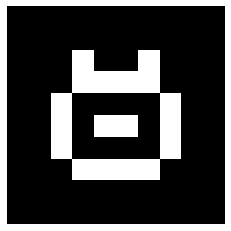

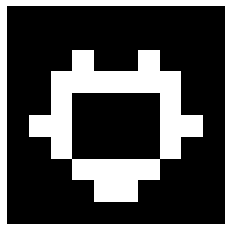

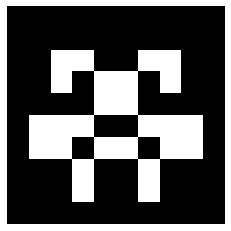

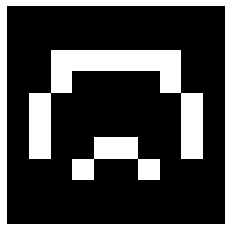

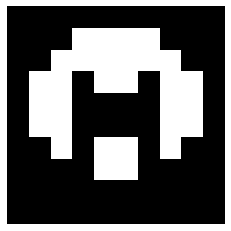

In [16]:
image = plansza1
game_lut_table = get_lut_table(game_rules)

for _ in range(5):
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    image = lut_hit_miss(image, game_lut_table)

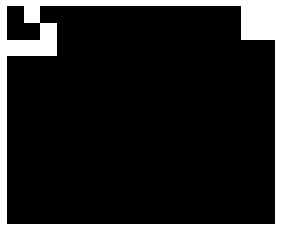

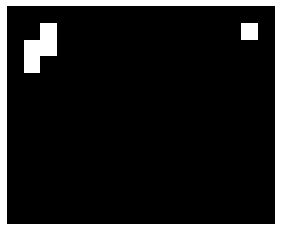

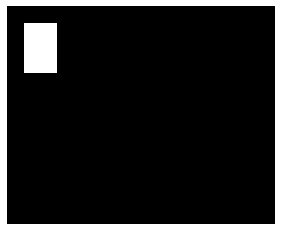

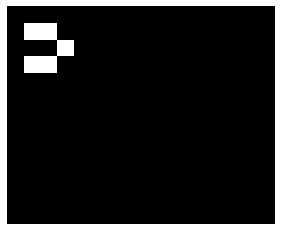

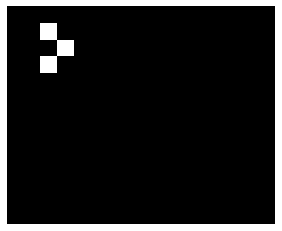

In [17]:
image = plansza2

for _ in range(5):
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    image = lut_hit_miss(image, game_lut_table)

In [18]:
extended_plansza2 = np.zeros((plansza2.shape[0]+2, plansza2.shape[1]+2), dtype='uint8')
extended_plansza2[1:-1, 1:-1] = plansza2

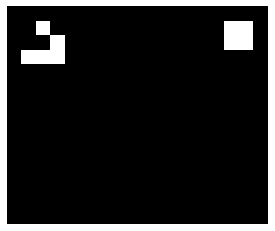

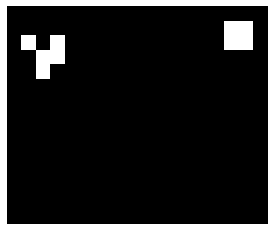

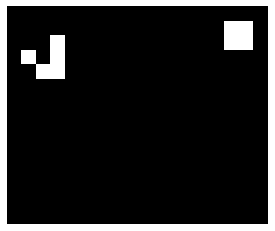

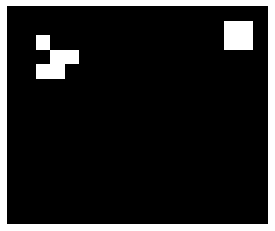

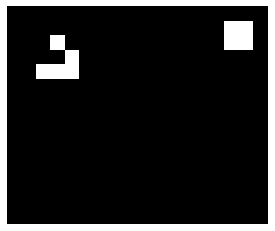

In [19]:
image = extended_plansza2

for _ in range(5):
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    image = lut_hit_miss(image, game_lut_table)